<a href="https://colab.research.google.com/github/Nburkhal/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# Create sales list
sales = [3505, 2400, 3017, 2798, 3700, 3250, 2689]

# Define function to calculate mean, variance, and std given a list
def mean_var_std(data):
  
  mean = sum(data) / len(data)   # sum values in list, divide by list length 
  
  var_list = []   # Create empty list to store calculations for variance
  
  for i in data:                 # iterate through list elements
    dist_sq = ((i - mean) ** 2)  # calculate distance squared
    var_list.append(dist_sq)     # append dist_sq to var_list
    variance = sum(var_list) / len(data)  # calculate variance
  
  std = variance ** 0.5          # calculate std
  
  return (mean, variance, std)

In [14]:
# Get values from our function
mean_var_std(sales)

(3051.285714285714, 183846.77551020405, 428.7735713756202)

In [15]:
# Test to see if func worked properly
import numpy as np
mean = np.mean(sales)
print(mean)
variance = np.var(sales)
print(variance)
std = np.std(sales)
print(std)

3051.285714285714
183846.77551020405
428.7735713756202


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [16]:
import pandas as pd

# Create customers list
customers = [127, 80, 105, 92, 120, 115, 93]

# Take sales and customers lists and create dictionary
data = {'sales': sales, 'customers': customers}

# Turn dictionary into dataframe
df = pd.DataFrame(data)
df.head()

,sales,customers
0,3505,127
1,2400,80
2,3017,105
3,2798,92
4,3700,120


In [19]:
# Find covariance between sales and customers
cov = df.cov()
cov

,sales,customers
sales,214487.904762,7603.642857
customers,7603.642857,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [45]:
# Find std of both customers and sales
_, _, std_cust = mean_var_std(customers)
_, _, std_sales = mean_var_std(sales)

# Calculate standardized covariance
covariance = cov
print(cov)
print(std_cust * std_sales)

r = covariance / (std_cust * std_sales)
r

                   sales    customers
sales      214487.904762  7603.642857
customers    7603.642857   290.952381
6771.198906193691


,sales,customers
sales,31.676503,1.122939
customers,1.122939,0.042969


In [42]:
# Use libraries to check our math

print(std_cust == np.std(customers))
print(std_sales == np.std(sales))
print(np.corrcoef(sales, customers), '\n')
df.corr()

True
True
[[1.         0.96251908]
 [0.96251908 1.        ]] 



,sales,customers
sales,1.000000,0.962519
customers,0.962519,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [46]:
# Get data from web
titanic_data = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

# Create dataframe
titanic = pd.read_csv(titanic_data)
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [48]:
# Rename sex column
titanic = titanic.rename(columns={'sex':'is_female'})

# Change sex column values to 1 for female, 0 for male
titanic['is_female'] = titanic['is_female'].replace(['female', 'male'], [1, 0])
titanic.head()

,Unnamed: 0,pclass,survived,name,is_female,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",1.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",0.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",1.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [50]:
# Check null values
print(titanic.shape)
titanic.isnull().sum()

(1310, 16)


Unnamed: 0             0
pclass                 1
survived               1
name                   1
is_female              1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [51]:
# Variance-covariance matrix
titanic.cov()

,Unnamed: 0,pclass,survived,is_female,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-22.561162,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-0.050011,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,0.123090,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
is_female,-22.561162,-0.050011,0.123090,0.229438,-0.354202,0.054690,0.088362,4.600321,0.387672,0.027508
age,-1442.939812,-3.954605,-0.314343,-0.354202,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,0.054690,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,0.088362,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,4.600321,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,0.387672,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,0.027508,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [52]:
# Correlation matrix
titanic.corr()

,Unnamed: 0,pclass,survived,is_female,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.124599,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.124617,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,0.528693,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
is_female,-0.124599,-0.124617,0.528693,1.000000,-0.057398,0.109609,0.213125,0.185523,0.015903,0.137396
age,-0.296172,-0.366370,-0.050199,-0.057398,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,0.109609,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,0.213125,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.185523,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.015903,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.137396,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

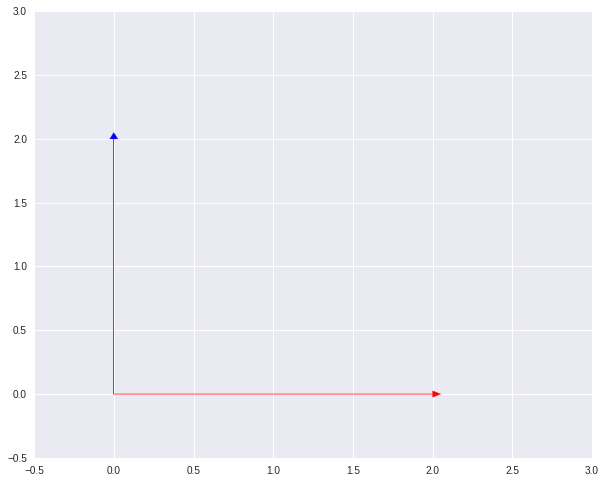

In [62]:
# Orthogonal = Perpendicular

#import necessary modules
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

# Plot the vectors
fig = plt.figure(figsize=(10, 8))

plt.arrow(0, 0, 2, 0, head_width=0.05, head_length=0.05, color='red')
plt.arrow(0, 0, 0, 2, head_width=0.05, head_length=0.05, color='blue')
plt.xlim(-.5, 3)
plt.ylim(-.5, 3)

plt.show();

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [63]:
# Create numpy arrays
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

np.dot(a, b)

-40

Not orthogonal. Dot product does not equal 0

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [66]:
# Create numpy array
c = np.array([2, -15, 6, 20])

# Calculate norm
norm = np.linalg.norm(c)

# Calculate dot product
dot = np.dot(c, c)

# Calculate c-transpose times c
ctc = np.matmul(c.T, c)

print(norm ** 2, '\n')
print(dot, '\n')
print(ctc)

665.0 

665 

665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\end{align}
 
 \begin{align}
 ||d|| = \sqrt{7^2 + 12^2} = \sqrt{49 + 144} = \sqrt{193}
\end{align}

 \begin{align}
 \hat{d} = \frac{1}{||d||}d = \frac{1}{\sqrt{193}}\begin{bmatrix} 7 \\ 12\end{bmatrix} = \begin{bmatrix} \frac{7}{\sqrt{193}} \\ \frac{12}{\sqrt{193}}\end{bmatrix}
\end{align}




\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix}
\end{align}
 
 \begin{align}
 ||e|| = \sqrt{2^2 + 11^2 + (-8)^2} = \sqrt{4 + 121 + 64} = \sqrt{189}
\end{align}

 \begin{align}
 \hat{e} = \frac{1}{||e||}e = \frac{1}{\sqrt{189}}\begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = \begin{bmatrix} \frac{2}{\sqrt{189}} \\ \frac{11}{\sqrt{189}}\\ \frac{-8}{\sqrt{189}}\end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [67]:
# Create numpy array
f = np.array([4, 12, 11, 9, 2])

# Calculate norm
fnorm = np.linalg.norm(f)
f_hat = (1 / fnorm) * f
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

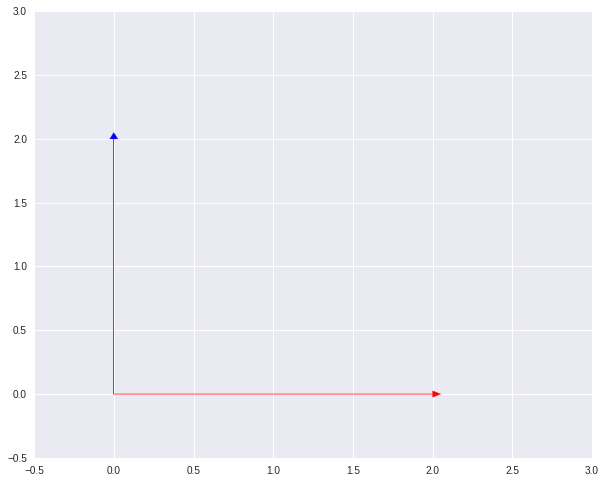

In [68]:
# Linearly independent

# Plot the vectors
fig = plt.figure(figsize=(10, 8))

plt.arrow(0, 0, 2, 0, head_width=0.05, head_length=0.05, color='red')
plt.arrow(0, 0, 0, 2, head_width=0.05, head_length=0.05, color='blue')
plt.xlim(-.5, 3)
plt.ylim(-.5, 3)

plt.show();

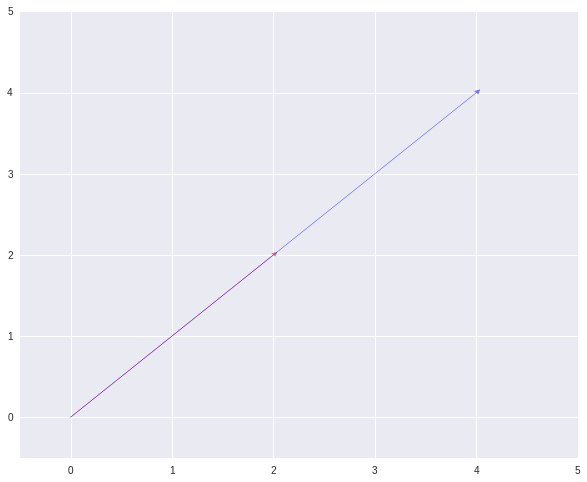

In [69]:
# Linearly dependent

# Plot the vectors
fig = plt.figure(figsize=(10, 8))

plt.arrow(0, 0, 2, 2, head_width=0.05, head_length=0.05, color='red', alpha=0.5)
plt.arrow(0, 0, 4, 4, head_width=0.05, head_length=0.05, color='blue', alpha=0.5)
plt.xlim(-.5, 5)
plt.ylim(-.5, 5)

plt.show();

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

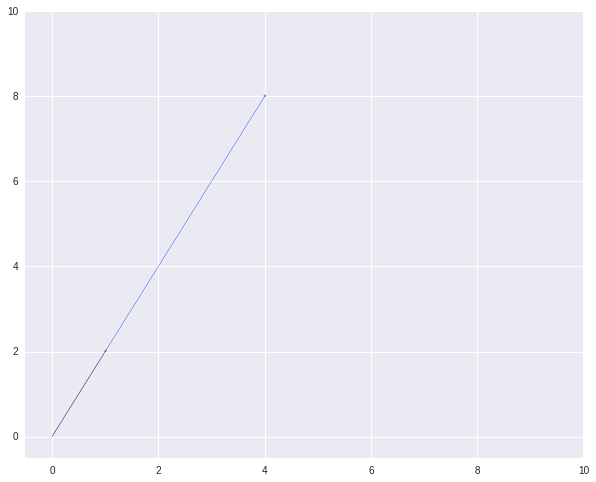

In [70]:
# store vectors as variables
g = [1, 2]
h = [4, 8]

# Plot vectors
fig = plt.figure(figsize=(10, 8))

plt.arrow(0, 0, 1, 2, head_width=0.05, head_length=0.05, color='red', alpha=0.5)
plt.arrow(0, 0, 4, 8, head_width=0.05, head_length=0.05, color='blue', alpha=0.5)
plt.xlim(-.5, 10)
plt.ylim(-.5, 10)

plt.show();

The span of g and h runs along the line in R1 whose equation is y = 0.5x

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [75]:
# store vectors as variables
l = np.array([1, 2, 3])
m = np.array([-1, 0, 7])
n = np.array([4, 8, 2])

# Add l to m
m = l + m

# Multiply l by -4 and add to n
n = (-4 * l) + n

# Divide m by 2 (multiply by 1/2)
m = m / 2

# Divide n by -10 (multiply by -1/10)
n = n / -10

print(l)
print(m)
print(n)

[1 2 3]
[0. 1. 5.]
[-0. -0.  1.]


The span of {l, m, n} is R3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



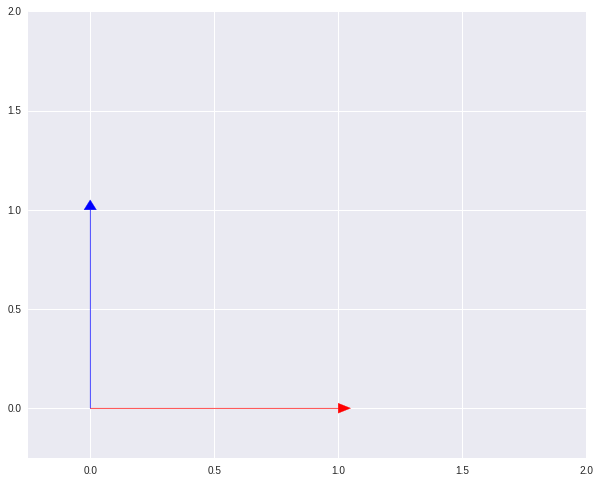

In [77]:
# Plot the vectors
fig = plt.figure(figsize=(10, 8))

plt.arrow(0, 0, 1, 0, head_width=0.05, head_length=0.05, color='red')
plt.arrow(0, 0, 0, 1, head_width=0.05, head_length=0.05, color='blue')
plt.xlim(-.25, 2)
plt.ylim(-.25, 2)

plt.show();

## 6.2 What does it mean to form a basis?

To have a set of linearly independent vectors that span the vector space V

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

3. Three. Tres. San. Drei

## 7.2 What does the rank of a matrix tell us?

The dimension of the vector space spanned by its columns

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [93]:
# Find c (plug and play)
v = np.array([1, 3])
w = np.array([-1, 2])
c = 0.5


np.dot(v, (w - c*v))

0.0

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


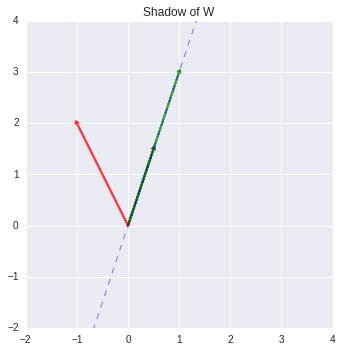

In [101]:
# Axis Bounds
plt.xlim(-2,4)          
plt.ylim(-2,4)

# Original Vector
v = [1,3] 
w = [-1,2]
proj = np.multiply(.5,v)

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1, alpha=0.5)
plt.arrow(0, 0, proj[0], proj[1], linewidth=2, head_width=.05, head_length=0.05, color ='black', alpha=0.7)
plt.arrow(0, 0, v[0], v[1], linewidth=2, head_width=.05, head_length=0.05, color ='green', alpha=0.7)
plt.arrow(0, 0, w[0], w[1], linewidth=2, head_width=.05, head_length=0.05, color ='red', alpha=0.7)

plt.title("Shadow of W")
plt.show();

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

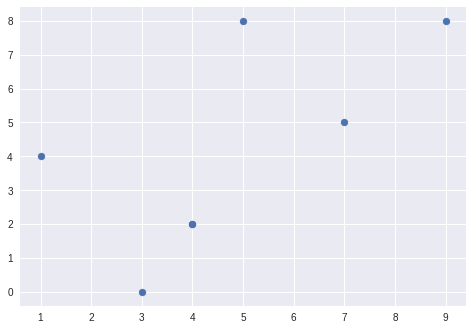

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()